In [62]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [63]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [64]:
df=pd.DataFrame(data)

In [65]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [66]:
print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')

Number of Rows: 32560
Number of Columns: 15


Checking for all the unique values against the attributes

In [67]:
for i, col in enumerate(df.columns):
  print(df.columns[i], '::\n', df[str(col)].unique(), '\n\n')

Age ::
 [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 


Workclass ::
 [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 


Fnlwgt ::
 [ 83311 215646 234721 ...  34066  84661 257302] 


Education ::
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 


Education_num ::
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 


Marital_status ::
 [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 


Occupation ::
 [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Tr

In [68]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [70]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [71]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [72]:
df['income_num']=df['Income'].map({'<=50K':0, '>50K':1})

In [73]:
below_50k=(df.income_num == 0).sum()
print(below_50k)

0


In [74]:
above_50k=(df.income_num == 1).sum()
print(above_50k)

0


Visualization

In [75]:
pd.crosstab(df['Native_country'], df['Income'], 
           values=df['Hours_per_week'], aggfunc=np.mean)

Income,<=50K,>50K
Native_country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000


Checking for the class imbalance of the Target Variable

Text(0, 0.5, 'Count')

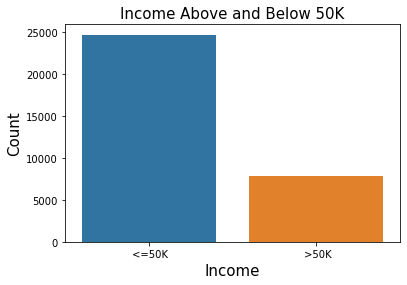

In [77]:
sns.countplot(df['Income'])
df.Income.value_counts()
plt.title('Income Above and Below 50K',fontsize=15)
plt.xlabel('Income',fontsize=15)
plt.ylabel('Count',fontsize=15)

Occupation vs Income

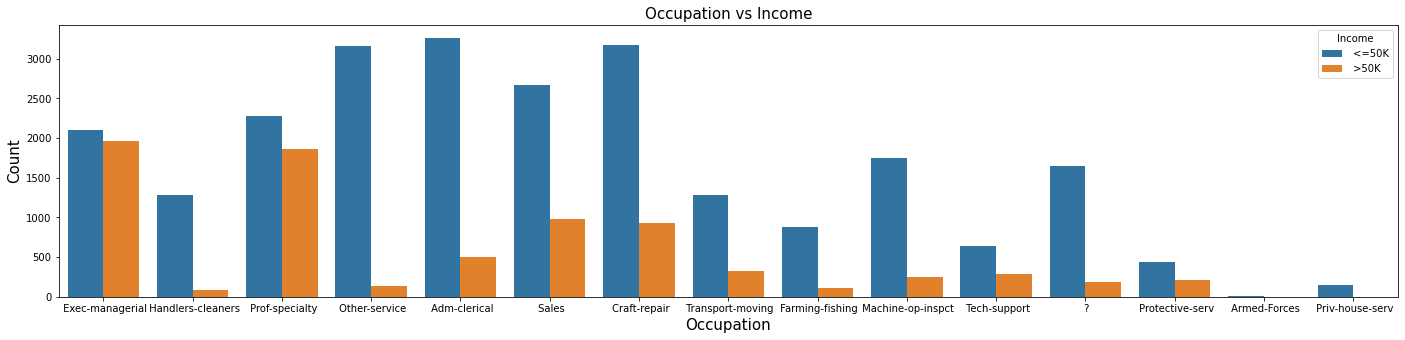

In [78]:
occupation, axes = plt.subplots(1,1,figsize=(24,5))
sns.countplot(data=df,x='Occupation',hue='Income')
plt.title('Occupation vs Income',fontsize=15)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Workclass vs Income

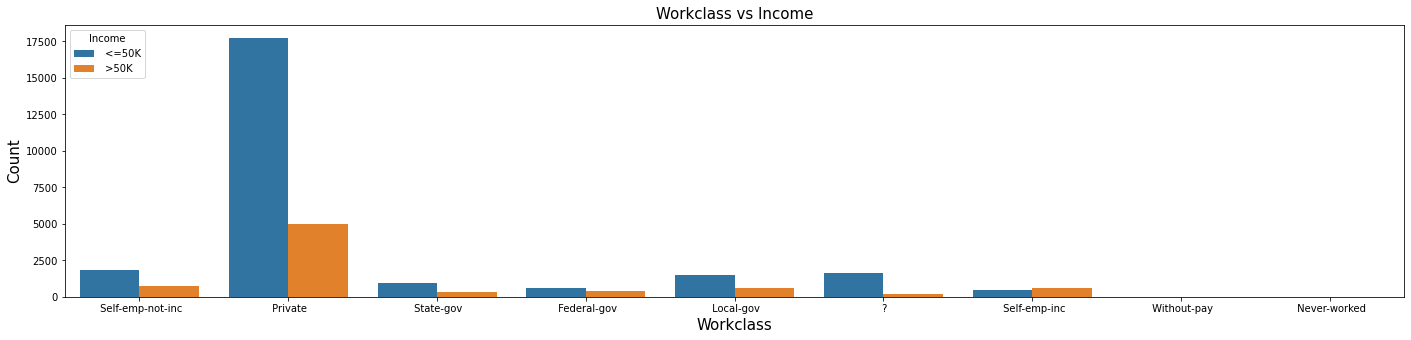

In [79]:
occupation, axes = plt.subplots(1,1,figsize=(24,5))
sns.countplot(data=df,x='Workclass',hue='Income')
plt.title('Workclass vs Income',fontsize=15)
plt.xlabel('Workclass',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Relation vs Income

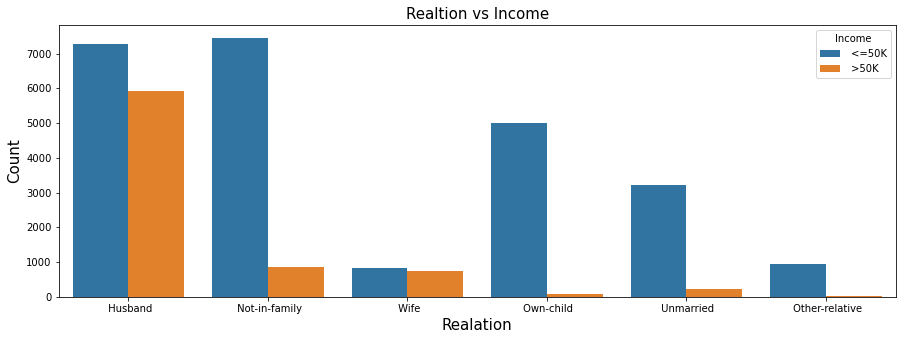

In [80]:
realtion, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(data=df,x='Relationship',hue='Income')
plt.title('Realtion vs Income',fontsize=15)
plt.xlabel('Realation',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Education Vs Income

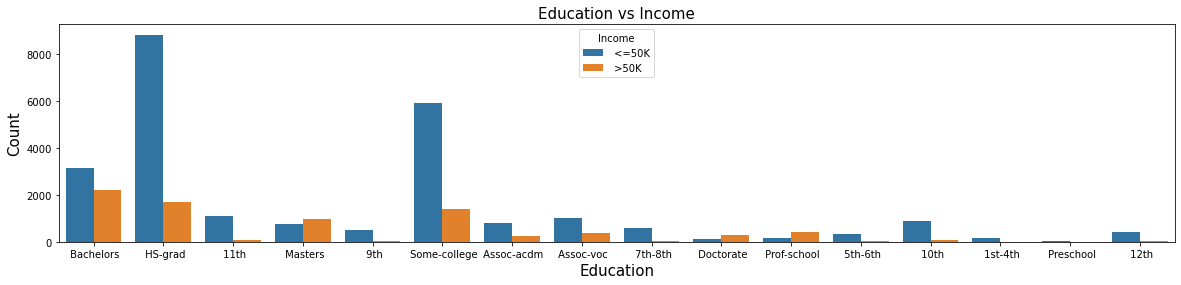

In [81]:
education, axes = plt.subplots(1,1,figsize=(20,4))
sns.countplot(data=df,x='Education',hue='Income')
plt.title('Education vs Income',fontsize=15)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Sex vs Income

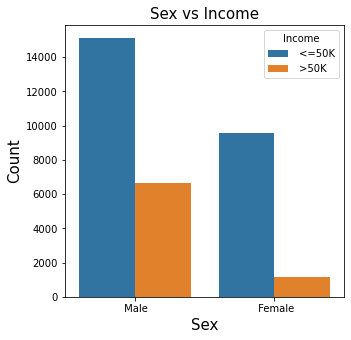

In [82]:
sex, axes = plt.subplots(1,1,figsize=(5,5))
sns.countplot(data=df,x='Sex',hue='Income')
plt.title('Sex vs Income',fontsize=15)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Race vs Income

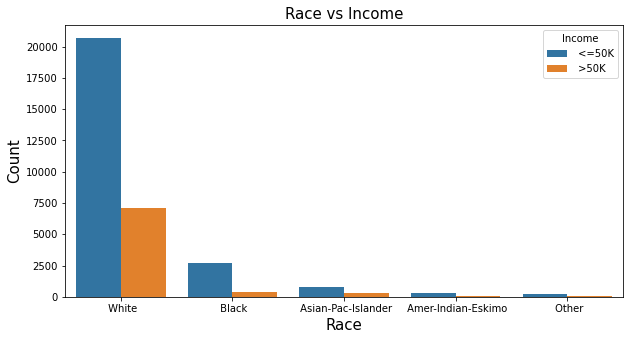

In [83]:
race, axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(data=df,x='Race',hue='Income')
plt.title('Race vs Income',fontsize=15)
plt.xlabel('Race',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Percentage of Race

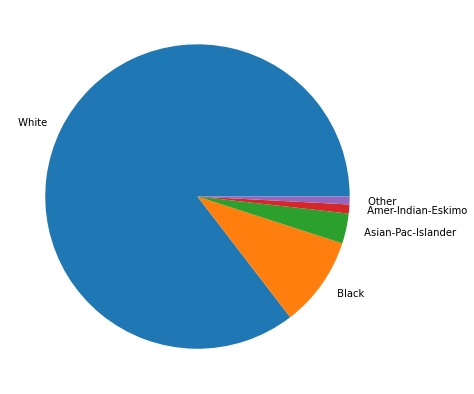

In [84]:
label=df.Race.value_counts().index
count=df.Race.value_counts().values
plt.figure(1, figsize=(7,7))
plt.pie(count,labels=label)
plt.show()

Percentage of Sex

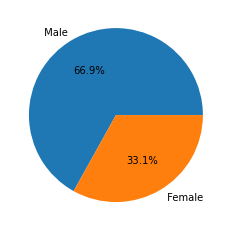

In [85]:
label=df.Sex.value_counts().index
count=df.Sex.value_counts().values
plt.figure(1, figsize=(4,4))
plt.pie(count,labels=label,autopct='%1.1f%%')
plt.show()

Age Distribution

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Count'>

findfont: Font family ["monospace'"] not found. Falling back to DejaVu Sans.


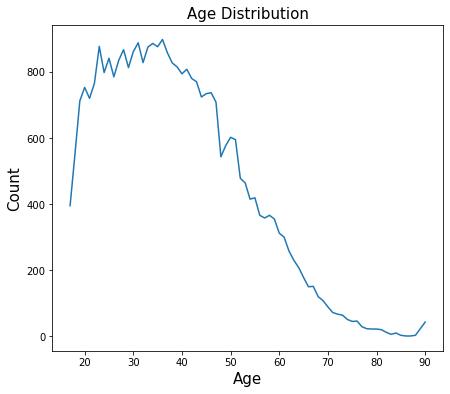

In [86]:
#Height and Width
size = plt.figure()
size.set_figwidth(7)
size.set_figheight(6)

plt.title("Age Distribution",fontdict={"fontname":"monospace'","fontsize":15})
plt.xlabel("Age",fontdict={"fontname":"monospace'","fontsize":15})
plt.ylabel("Count",fontdict={"fontname":"monospace'","fontsize":15})

#Show Plot
df['Age'].value_counts().sort_index().plot.line()

Hours Per Week Distribution

<AxesSubplot:title={'center':'Hours Per Week Distribution'}, xlabel='Hours Per Week', ylabel='Count'>

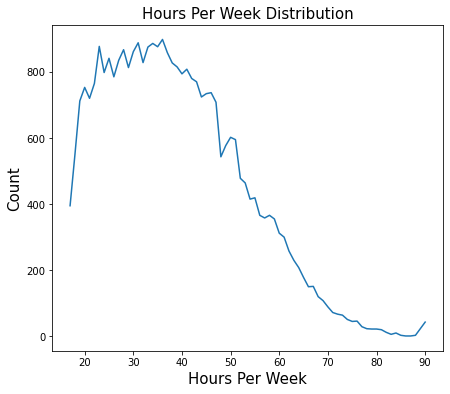

In [87]:
#Height and Width
size = plt.figure()
size.set_figwidth(7)
size.set_figheight(6)

plt.title("Hours Per Week Distribution",fontdict={"fontname":"monospace'","fontsize":15})
plt.xlabel("Hours Per Week",fontdict={"fontname":"monospace'","fontsize":15})
plt.ylabel("Count",fontdict={"fontname":"monospace'","fontsize":15})

#Show Plot
df['Age'].value_counts().sort_index().plot.line()

Capital Loss vs Count

array([<AxesSubplot:title={'center':'Capital_loss'}>], dtype=object)

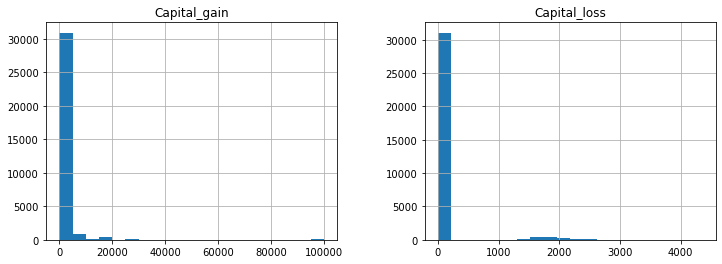

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
df.hist('Capital_gain', bins=20, ax=axes[0])
df.hist('Capital_loss', bins=20, ax=axes[1])

Scatter Plot with Repect all Columns

ValueError: zero-size array to reduction operation minimum which has no identity

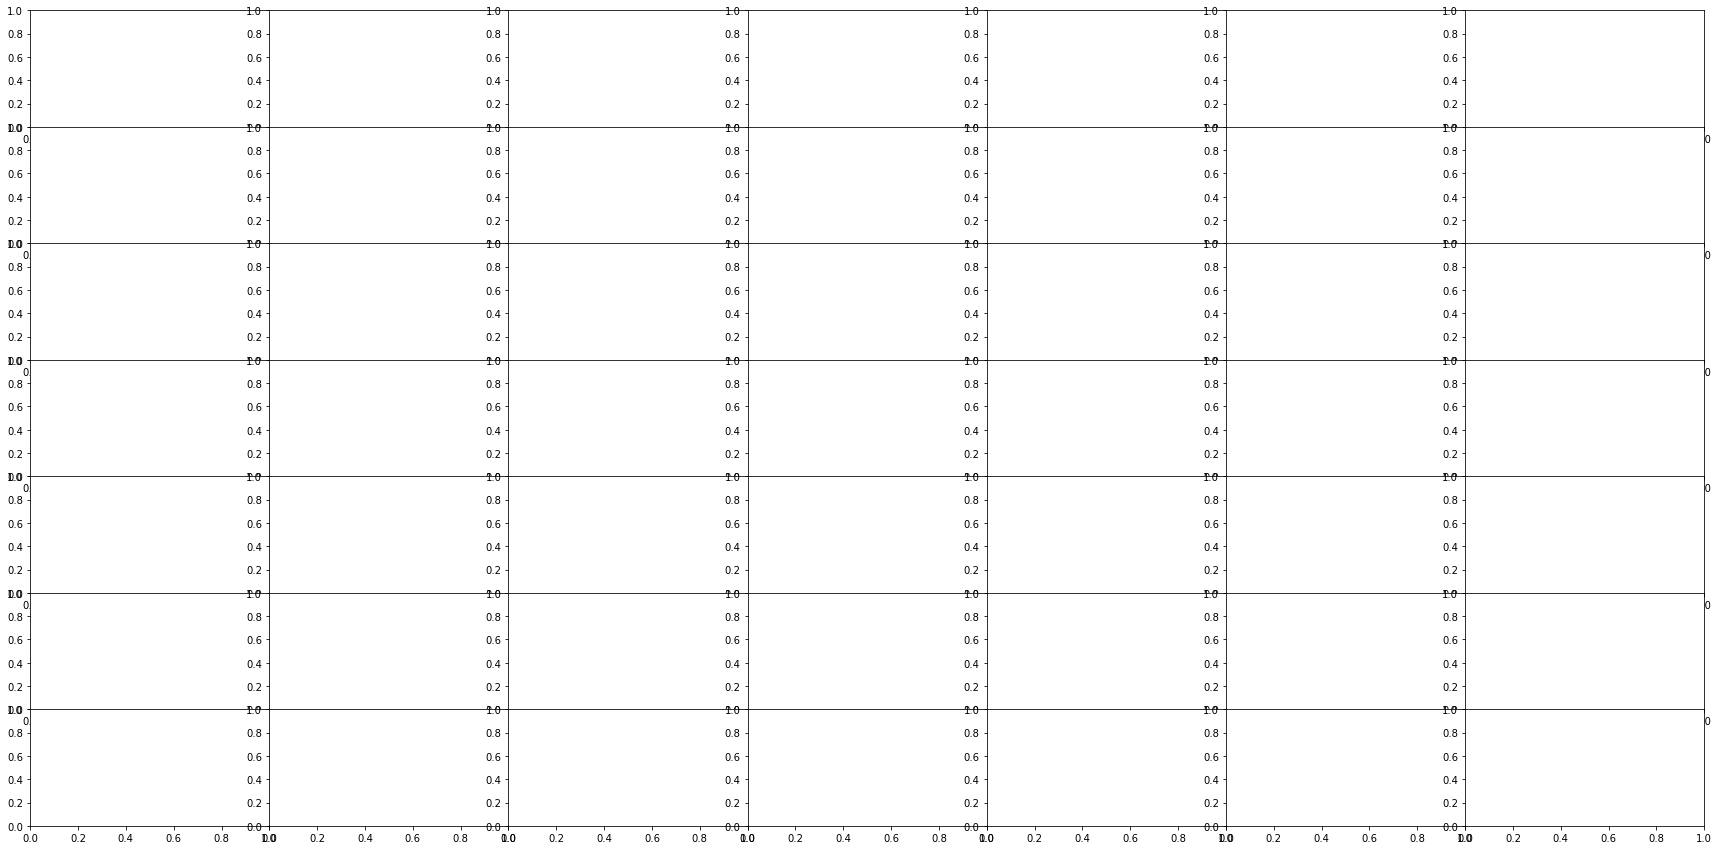

In [91]:
pd.plotting.scatter_matrix(df, alpha=0.2,figsize=(30,15))
plt.show()

<AxesSubplot:>

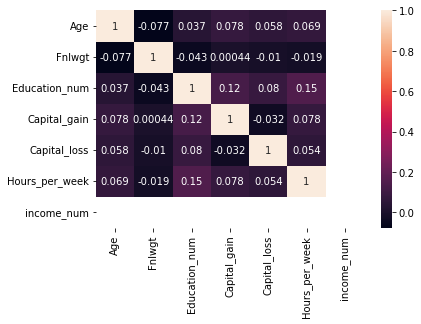

In [92]:
sns.heatmap(df.corr(), annot=True)

Data Preparation

In [94]:
df=df.drop(['Income','Fnlwgt'], axis = 1)

Text to Int Conversion

In [95]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Workclass"]=le.fit_transform(df["Workclass"])
df["Education"]=le.fit_transform(df["Education"])
df["Education_num"]=le.fit_transform(df["Education_num"])
df["Marital_status"]=le.fit_transform(df["Marital_status"])
df["Occupation"]=le.fit_transform(df["Occupation"])
df["Race"]=le.fit_transform(df["Race"])
df["Sex"]=le.fit_transform(df["Sex"])
df["Native_country"]=le.fit_transform(df["Native_country"])
df["Relationship"]=le.fit_transform(df["Relationship"])
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,income_num
0,50,6,9,12,2,4,0,4,1,0,0,13,39,NaN
1,38,4,11,8,0,6,1,4,1,0,0,40,39,NaN
2,53,4,1,6,2,6,0,2,1,0,0,40,39,NaN
3,28,4,9,12,2,10,5,2,0,0,0,40,5,NaN
4,37,4,12,13,2,4,5,4,0,0,0,40,39,NaN


In [100]:
df=df.dropna()

In [101]:
df.isnull().sum()

Age               0.0
Workclass         0.0
Education         0.0
Education_num     0.0
Marital_status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Sex               0.0
Capital_gain      0.0
Capital_loss      0.0
Hours_per_week    0.0
Native_country    0.0
income_num        0.0
dtype: float64